# Boston_Housing - Regression Analysis

## Import TensorFlow & Keras

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [6]:
# GPU 설정 OFF (GPU 사용 여부에 크게 영향 안받음)
tf.test.gpu_device_name()

''

In [8]:
import keras

keras.__version__

'2.4.3'

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_set

In [9]:
from keras.datasets import boston_housing
(train_data, train_targets), (X_test, y_test) =  boston_housing.load_data()


57344/57026 [==============================] - 0s 0us/step


> ## 2) Data_set Information

In [11]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])


(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. DataPreprocessing

> ## 1) Standardization

In [12]:
# train_data & test_data

In [14]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [15]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets, 
                                                      test_size = 0.2, 
                                                      random_state = 2045)
 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape


((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [18]:
from keras import models
from keras import layers

In [19]:
boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,))) # 13 열을 가진 데이터터
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [20]:
boston.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [21]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 3) Model Fit

In [23]:
%%time
Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))


Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 341.0276 - mae: 15.6194 - val_loss: 47.7051 - val_mae: 4.1037
Epoch 2/500
323/323 [==============================] - 1s 2ms/step - loss: 28.5444 - mae: 3.8807 - val_loss: 27.3622 - val_mae: 3.0318
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 20.1239 - mae: 2.9544 - val_loss: 22.2970 - val_mae: 2.6561
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 17.3351 - mae: 2.7831 - val_loss: 18.4152 - val_mae: 2.4189
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 15.5739 - mae: 2.6616 - val_loss: 16.9515 - val_mae: 2.3334
Epoch 6/500
323/323 [==============================] - 0s 1ms/step - loss: 11.5183 - mae: 2.3186 - val_loss: 17.5840 - val_mae: 2.5091
Epoch 7/500
323/323 [==============================] - 0s 2ms/step - loss: 8.0641 - mae: 2.0593 - val_loss: 15.9777 - val_mae: 2.6455
Epoch 8/500
323/323 [==============================] -

> ## 4) Model Evaluate

In [25]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 13.5787 - mae: 2.4157
MAE is : 2.415661096572876


> ## 5) Visualization

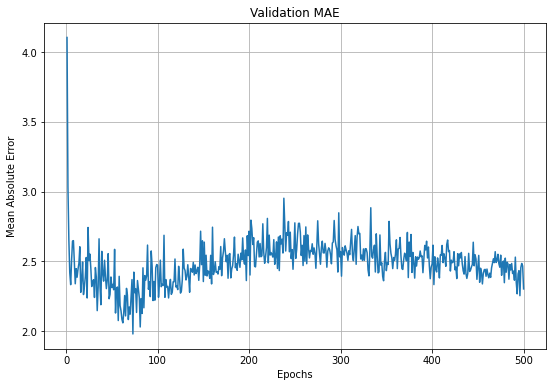

In [26]:
# 전체 시각화

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()


In [30]:
# 5번째 이후 MAE 확인

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

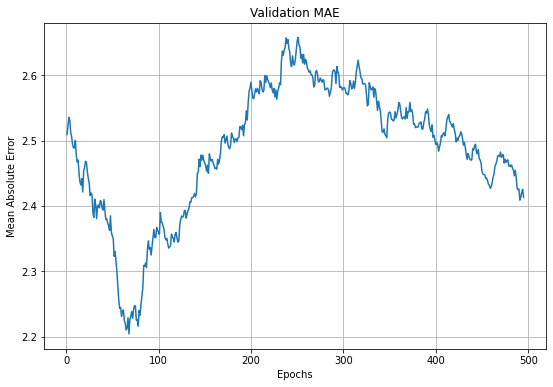

In [31]:
mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()


> ## 6) Keras Session Clear

In [32]:
from keras import backend as K

K.clear_session()

# IV. Early Stopping

> ## 1) Model Define & Compile

In [33]:
from keras import models
from keras import layers

In [35]:
boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])


> ## 2) EarlyStopping()

* monitor: 모니터링 대상 성능
* mode: 모니터링 대상을 최소화(min) 또는 최대화(max)
* patience: 성능이 개선되지 않는 epoch 횟수

In [37]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

> ## 3) ModelCheckpoint()

* 'best_boston.h5': 최적모델이 저장될 경로
* save_best_only: 최적모델만 저장할지 지정

In [38]:
from keras.callbacks import ModelCheckpoint

In [39]:
mc = ModelCheckpoint('best_boston.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

* callbacks: Earlystopping()과 ModelCheckpoint() 객체 지정

In [41]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 373.5789 - mae: 16.2678 - val_loss: 41.4512 - val_mae: 3.7190

Epoch 00001: val_mae improved from inf to 3.71896, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 0s 1ms/step - loss: 43.6449 - mae: 4.3338 - val_loss: 31.5018 - val_mae: 3.2205

Epoch 00002: val_mae improved from 3.71896 to 3.22052, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 0s 1ms/step - loss: 21.1624 - mae: 3.0429 - val_loss: 31.4701 - val_mae: 3.2799

Epoch 00003: val_mae did not improve from 3.22052
Epoch 4/500
323/323 [==============================] - 0s 1ms/step - loss: 13.5103 - mae: 2.5674 - val_loss: 26.6136 - val_mae: 3.1923

Epoch 00004: val_mae improved from 3.22052 to 3.19228, saving model to best_boston.h5
Epoch 5/500
323/323 [==============================] - 0s 1ms/step - loss: 19.9245 - mae: 2.8451 - val_loss: 21.7100 - val_mae: 2.6745

Epoch 00005: v

> ## 5) Best Model

In [42]:
!ls -l

total 76
-rw-r--r-- 1 root root 70296 Mar 19 06:29 best_boston.h5
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data


> ## 6) Model Evaluate

In [43]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 21.3256 - mae: 2.9621
MAE is : 2.9620606899261475
